<a href="https://colab.research.google.com/github/LukmaanViscomi/AI-Deep-Learning/blob/main/Baseline_Controlled_V6_2_visualisation_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


hack to get theh keras tunner model into google drive

In [ ]:
### Section 1: Setup and Dependencies
!apt-get install p7zip-full # Install 7-Zip
!pip install patool # Install the patool library which provides the patoolib module
import zipfile
import os
import patoolib # Now you can import patoolib

# Path to the uploaded zip file
zip_file_path = '/content/drive/MyDrive/my_dir-20240902T193513Z-001.zip'
extracted_folder_path = '/content/drive/MyDrive'  # Use a relative path for the extraction directory

# Extract the zip file using patool
patoolib.extract_archive(zip_file_path, outdir=extracted_folder_path)

# List the contents of the extracted folder
extracted_files = os.listdir(extracted_folder_path)
print(extracted_files)

### Section 2 : Inspecting the Original Dataset

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


INFO patool: Extracting /content/drive/MyDrive/my_dir-20240902T193513Z-001.zip ...
INFO:patool:Extracting /content/drive/MyDrive/my_dir-20240902T193513Z-001.zip ...
INFO patool: running /usr/bin/7z x -o/content/drive/MyDrive -- /content/drive/MyDrive/my_dir-20240902T193513Z-001.zip
INFO:patool:running /usr/bin/7z x -o/content/drive/MyDrive -- /content/drive/MyDrive/my_dir-20240902T193513Z-001.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/drive/MyDrive/my_dir-20240902T193513Z-001.zip extracted to `/content/drive/MyDrive'.
INFO:patool:... /content/drive/MyDrive/my_dir-20240902T193513Z-001.zip extracted to `/content/drive/MyDrive'.


['Kickoff meeting for the "Upper Hand" (qjs-maap-gsc – 14 Nov 2023).gjam', 'Notes – Kick off Meeting for "The Upper Hand".gdoc', 'abu_ghuddah_-_prophet_muhammad_the_teacher (1).pdf', 'Certainly.gdoc', 'Intro to studying Hadith.pptx', 'Copy of THE UPPER HAND.gslides', 'Shafeek - 2h - NLP Breakthough Session (ieh-hvmo-jyz – 22 Jan 2024).gjam', 'Payment-11886.pdf', 'Hull Online - step by step enrolment-1.docx', 'Colab Notebooks', 'HULL MSC Artificial intelligence - Study Group', 'Notes – HULL MSC Artificial Intelligence - Weekly Study Group.gdoc', 'DAWAH KNOWLEDGE BASE', 'COACHSTATE', 'mobilepresent', 'Slides_Last 3 Verses of Al-Baqarah.pptx', 'Invoice_.pdf', 'Portal.gsite', 'Lukhman.docx', 'Copy of Uthman Retreat - Zionism.gslides', 'dataset2 (1).zip', 'Group Project - Group Work.gdoc', '.ipynb_checkpoints', 'Google Earth', 'The Last Three.gslides', 'Untitled presentation (1).gslides', 'Untitled presentation.gslides', 'THE UPPER HAND.gslides', 'The Prophet’s (S.A.W) methods for correctin

### Unzip The Data

In [ ]:
### Section 1: Setup and Dependencies
!apt-get install p7zip-full # Install 7-Zip
!pip install patool # Install the patool library which provides the patoolib module
import zipfile
import os
import patoolib # Now you can import patoolib

# Path to the uploaded zip file
zip_file_path = '/content/drive/MyDrive/dataset2 (1).zip'
extracted_folder_path = './dataset2'  # Use a relative path for the extraction directory

# Extract the zip file using patool
patoolib.extract_archive(zip_file_path, outdir=extracted_folder_path)

# List the contents of the extracted folder
extracted_files = os.listdir(extracted_folder_path)
print(extracted_files)

### Section 2 : Inspecting the Original Dataset


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 7.8 MB/s eta 0:00:00


INFO patool: Extracting /content/drive/MyDrive/dataset2 (1).zip ...
INFO:patool:Extracting /content/drive/MyDrive/dataset2 (1).zip ...
INFO patool: ... creating output directory `./dataset2'.
INFO:patool:... creating output directory `./dataset2'.
INFO patool: running /usr/bin/7z x -o./dataset2 -- "/content/drive/MyDrive/dataset2 (1).zip"
INFO:patool:running /usr/bin/7z x -o./dataset2 -- "/content/drive/MyDrive/dataset2 (1).zip"
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/drive/MyDrive/dataset2 (1).zip extracted to `./dataset2'.
INFO:patool:... /content/drive/MyDrive/dataset2 (1).zip extracted to `./dataset2'.


['triple_mnist']


### Redistribute The Dataset For Train/Val/Test

In [ ]:
#
import os
import shutil
from pathlib import Path
import random

# Paths to original directories
original_base_dir = Path('dataset2/triple_mnist')
original_train_dir = original_base_dir / 'train'
original_val_dir = original_base_dir / 'val'
original_test_dir = original_base_dir / 'test'

# Path to the new dataset directory
new_base_dir = Path('dataset-c/triple_mnist')
new_train_dir = new_base_dir / 'train'
new_val_dir = new_base_dir / 'val'
new_test_dir = new_base_dir / 'test'

# Ensure the new directories exist
new_train_dir.mkdir(parents=True, exist_ok=True)
new_val_dir.mkdir(parents=True, exist_ok=True)
new_test_dir.mkdir(parents=True, exist_ok=True)

# Function to split and copy files
def split_and_copy_files(src_dir, new_train_dir, new_val_dir, new_test_dir, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2):
    if not src_dir.exists():
        return

    classes = sorted(os.listdir(src_dir))

    for cls in classes:
        cls_path = src_dir / cls
        if cls_path.is_dir():
            images = list(cls_path.glob('*'))
            random.shuffle(images)

            num_train = int(len(images) * train_ratio)
            num_val = int(len(images) * val_ratio)

            train_images = images[:num_train]
            val_images = images[num_train:num_train+num_val]
            test_images = images[num_train+num_val:]

            cls_train_dir = new_train_dir / cls
            cls_val_dir = new_val_dir / cls
            cls_test_dir = new_test_dir / cls

            cls_train_dir.mkdir(parents=True, exist_ok=True)
            cls_val_dir.mkdir(parents=True, exist_ok=True)
            cls_test_dir.mkdir(parents=True, exist_ok=True)

            for img in train_images:
                shutil.copy(str(img), str(cls_train_dir / img.name))
            for img in val_images:
                shutil.copy(str(img), str(cls_val_dir / img.name))
            for img in test_images:
                shutil.copy(str(img), str(cls_test_dir / img.name))

# Split and copy files from original train, val, and test directories
split_and_copy_files(original_train_dir, new_train_dir, new_val_dir, new_test_dir)
split_and_copy_files(original_val_dir, new_train_dir, new_val_dir, new_test_dir)
split_and_copy_files(original_test_dir, new_train_dir, new_val_dir, new_test_dir)

print("Files split and copied successfully!")

Files split and copied successfully!


### Imports and Initial Setup -Define Directory

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight



### Data Generators for the Subset

In [ ]:
# Define directories for training, validation, and testing datasets
train_dir = os.path.join('/content/dataset-c/triple_mnist/train')
val_dir = os.path.join('/content/dataset-c/triple_mnist/val')
test_dir = os.path.join('/content/dataset-c/triple_mnist/test')

# Image size and batch size
image_size = (42, 42)
batch_size = 32

# Create ImageDataGenerator with color_mode set to 'grayscale'
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load images with 'grayscale' mode
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',  # Convert images to grayscale
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',  # Convert images to grayscale
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',  # Convert images to grayscale
    shuffle=False
)

Found 60000 images belonging to 1000 classes.
Found 20000 images belonging to 1000 classes.
Found 20000 images belonging to 1000 classes.


### Build the model - for custome visualisaiton testing

In [ ]:
!pip install keras-tuner -q

import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# Function to build the model with hyperparameters
def build_model(hp):
    model = Sequential()

    # Hyperparameters to tune
    hp_filters_1 = hp.Int('filters_1', min_value=32, max_value=128, step=32)
    hp_filters_2 = hp.Int('filters_2', min_value=64, max_value=256, step=64)
    hp_dense_units = hp.Int('dense_units', min_value=64, max_value=256, step=64)
    hp_dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    hp_l2_reg = hp.Float('l2_regularization', min_value=1e-5, max_value=1e-2, sampling='log')
    hp_batch_size = hp.Choice('batch_size', values=[16, 32, 64])
    hp_activation = hp.Choice('activation', values=['relu', 'leaky_relu', 'sigmoid', 'tanh'])

    # First convolutional layer
    model.add(Conv2D(hp_filters_1, (3, 3), input_shape=(42, 42, 1), kernel_regularizer=l2(hp_l2_reg)))
    if hp_activation == 'leaky_relu':
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
    else:
        model.add(tf.keras.layers.Activation(hp_activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(Conv2D(hp_filters_2, (3, 3), kernel_regularizer=l2(hp_l2_reg)))
    if hp_activation == 'leaky_relu':
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
    else:
        model.add(tf.keras.layers.Activation(hp_activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Fully connected layer
    model.add(Flatten())
    model.add(Dense(hp_dense_units, kernel_regularizer=l2(hp_l2_reg)))
    if hp_activation == 'leaky_relu':
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
    else:
        model.add(tf.keras.layers.Activation(hp_activation))
    model.add(BatchNormalization())
    model.add(Dropout(hp_dropout_rate))

    # Output layer
    model.add(Dense(train_generator.num_classes, activation='softmax'))

    # Compile model
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Instantiate the Keras Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='/content/drive/MyDrive/my_dir',
    project_name='cnn_tuning'
)

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

# Run the hyperparameter search
tuner.search(train_generator,
             epochs=20,
             validation_data=val_generator,
             callbacks=[early_stopping, reduce_lr])

# Get the best hyperparameters and model
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(f"Filters for 1st Conv Layer: {best_hp.get('filters_1')}")
print(f"Filters for 2nd Conv Layer: {best_hp.get('filters_2')}")
print(f"Dense Units: {best_hp.get('dense_units')}")
print(f"Dropout Rate: {best_hp.get('dropout_rate')}")
print(f"Learning Rate: {best_hp.get('learning_rate')}")
print(f"L2 Regularization: {best_hp.get('l2_regularization')}")
print(f"Batch Size: {best_hp.get('batch_size')}")
print(f"Activation Function: {best_hp.get('activation')}")

# Print the model architecture
print("\nWinning Model Architecture:")
best_model.summary()

# Train the model with the best hyperparameters on the full dataset
history = best_model.fit(train_generator,
                         epochs=20,
                         validation_data=val_generator,
                         callbacks=[early_stopping, reduce_lr])


# Plot learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')


Reloading Tuner from /content/drive/MyDrive/my_dir/cnn_tuning/tuner0.json


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras_tuner/src/tuners/hyperband.py:435: UserWarning: Model 'sequential' had a build config, but the model cannot be built automatically in `build_from_config(config)`. You should implement `def build_from_config(self, config)`, and you might also want to implement the method  that generates the config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the model (i.e. its variables) upon deserialization.
  model.build_from_config(
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters:
Filters for 1st Conv Layer: 96
Filters for 2nd Conv Layer: 64
Dense Units: 128
Dropout Rate: 0.4
Learning Rate: 0.00025071332274895686
L2 Regularization: 0.002369069534544757
Batch Size: 16
Activation Function: leaky_relu

Winning Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 40, 40, 96)          │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 40, 40, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 40, 40, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 20, 20, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 18, 18, 64)          │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 18, 18, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         663,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │         129,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 850,152 (3.24 MB)

 Trainable params: 849,576 (3.24 MB)

 Non-trainable params: 576 (2.25 KB)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 523s 277ms/step - accuracy: 0.9352 - loss: 0.4121 - val_accuracy: 0.9602 - val_loss: 0.3561 - learning_rate: 2.5071e-04
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 564s 279ms/step - accuracy: 0.9481 - loss: 0.3975 - val_accuracy: 0.9519 - val_loss: 0.3900 - learning_rate: 2.5071e-04
Epoch 3/20


In [ ]:
for layer in best_model.layers:
    print(layer.name)


conv2d
leaky_re_lu
batch_normalization
max_pooling2d
conv2d_1
leaky_re_lu_1
batch_normalization_1
max_pooling2d_1
flatten
dense
leaky_re_lu_2
batch_normalization_2
dropout
dense_1


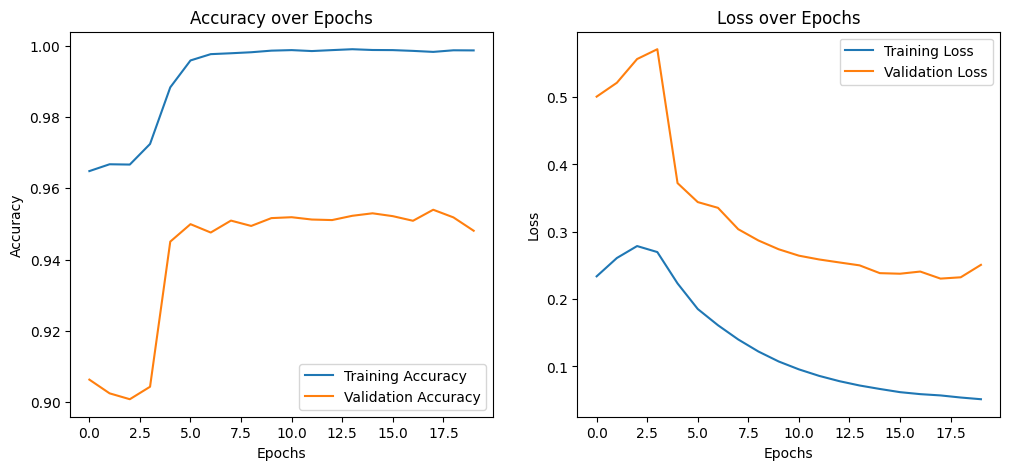

In [ ]:
import matplotlib.pyplot as plt

# Plot learning curves
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


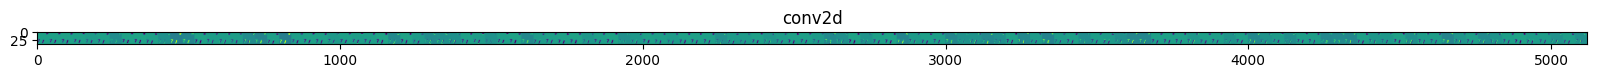

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Function to visualize feature maps
def visualize_feature_maps(model, image, layer_name):
    # Create a model that outputs the feature maps of the specified layer
    feature_extractor = Model(inputs=model.inputs, outputs=model.get_layer(layer_name).output)

    # Expand dimensions to match input shape of the model (batch size, height, width, channels)
    image = np.expand_dims(image, axis=0)

    # Get the feature maps
    feature_maps = feature_extractor.predict(image)

    # Plot the feature maps
    num_filters = feature_maps.shape[-1]
    size = feature_maps.shape[1]
    display_grid = np.zeros((size, size * num_filters))

    for i in range(num_filters):
        x = feature_maps[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / num_filters
    plt.figure(figsize=(scale * num_filters, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Fetch an image from the generator
sample_image, _ = next(train_generator)

# Visualize the feature maps for the first convolutional layer
visualize_feature_maps(best_model, sample_image[0], 'conv2d')  # Replace 'conv2d' with your actual layer name


In [ ]:
test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')


625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9572 - loss: 0.2644
Test accuracy: 0.9556
Test loss: 0.2656


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Generate predictions (outputs probabilities)
pred_probs = best_model.predict(test_generator)

# Convert probabilities to class predictions
pred_classes = np.argmax(pred_probs, axis=1)

# Get true classes from generator
true_classes = test_generator.classes

# Generate a classification report
report = classification_report(true_classes, pred_classes, target_names=test_generator.class_indices.keys())
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, pred_classes)
print(conf_matrix)


625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step
              precision    recall  f1-score   support

         000       1.00      1.00      1.00        20
         001       0.95      1.00      0.98        20
         002       1.00      0.95      0.97        20
         003       0.95      0.95      0.95        20
         004       0.95      1.00      0.98        20
         005       1.00      0.95      0.97        20
         006       0.87      1.00      0.93        20
         007       1.00      1.00      1.00        20
         008       1.00      0.95      0.97        20
         009       1.00      1.00      1.00        20
         010       1.00      0.80      0.89        20
         011       0.90      0.95      0.93        20
         012       0.95      0.90      0.92        20
         013       0.90      0.95      0.93        20
         014       0.95      0.95      0.95        20
         015       0.83      0.95      0.88        20
         016       0.95      1.00      

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Function to visualize feature maps
def visualize_feature_maps(model, image):
    # Iterate through each layer in the model
    for layer in model.layers:
        # Check if the layer is a convolutional layer
        if 'conv' in layer.name:
            feature_extractor = Model(inputs=model.inputs, outputs=layer.output)
            image = np.expand_dims(image, axis=0)
            feature_maps = feature_extractor.predict(image)

            # Plot the feature maps
            num_filters = feature_maps.shape[-1]
            size = feature_maps.shape[1]
            display_grid = np.zeros((size, size * num_filters))

            for i in range(num_filters):
                x = feature_maps[0, :, :, i]
                x -= x.mean()
                x /= x.std() if x.std() > 0 else 1  # Avoid division by zero
                x *= 64
                x += 128
                x = np.clip(x, 0, 255).astype('uint8')
                display_grid[:, i * size : (i + 1) * size] = x

            scale = 20. / num_filters
            plt.figure(figsize=(scale * num_filters, scale))
            plt.title(layer.name)
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')
            plt.show()

# Fetch an image from the generator
sample_image, _ = next(train_generator)

# Visualize the feature maps for each convolutional layer
visualize_feature_maps(best_model, sample_image[0])
